In [2]:
import numpy as np
import pandas as pd

import sqlalchemy

import matplotlib as mpl
import matplotlib.pyplot as plt
import mplfinance as mpf
import warnings

from common.bar_funcs import read_tick_from_sql, read_bar_from_sql, show_bar_volume

warnings.filterwarnings("ignore")

for m in [np, pd, sqlalchemy, mpl, mpf]:
    print(m.__name__, m.__version__)

numpy 1.25.2
pandas 2.0.3
sqlalchemy 2.0.19
matplotlib 3.7.1
mplfinance 0.12.10b0


In [3]:
SYMBOL = 'FG2401'

START_DATE = '20230801'
START_TIME = '00:00:00'

T_COLUMNS = ['open', 'high', 'low', 'last', 'volume', 'ask1_price', 'ask1_volume', 'bid1_price', 'bid1_volume']
B_COLUMNS = ['open', 'high', 'low', 'close', 'volume', 'ask_price', 'ask_volume', 'bid_price', 'bid_volume']


In [4]:
df_tick = read_tick_from_sql(SYMBOL, START_DATE, START_TIME, batch_size=1000)
print(df_tick.shape)
# df_tick.describe()

(1000, 21)


In [5]:
df_tick[df_tick['time'] >= START_TIME][T_COLUMNS].head(13)

,open,high,low,last,volume,ask1_price,ask1_volume,bid1_price,bid1_volume
ts,,,,,,,,,
2023-08-11 22:26:42,1592.0,1602.0,1578.0,1582.0,226495,1583.0,258,1582.0,356
2023-08-11 22:26:44,1592.0,1602.0,1578.0,1582.0,226495,1583.0,256,1582.0,356
2023-08-11 22:26:46,1592.0,1602.0,1578.0,1583.0,226505,1583.0,246,1582.0,369
2023-08-11 22:26:46,1592.0,1602.0,1578.0,1582.0,226506,1583.0,246,1582.0,368
2023-08-11 22:26:47,1592.0,1602.0,1578.0,1583.0,226508,1583.0,245,1582.0,368
2023-08-11 22:26:47,1592.0,1602.0,1578.0,1582.0,226515,1583.0,245,1582.0,361
2023-08-11 22:26:48,1592.0,1602.0,1578.0,1582.0,226515,1583.0,246,1582.0,361
2023-08-11 22:26:48,1592.0,1602.0,1578.0,1583.0,226521,1583.0,240,1582.0,361
2023-08-11 22:26:49,1592.0,1602.0,1578.0,1582.0,226522,1583.0,241,1582.0,360


In [6]:
df_bar_sec_5 = read_bar_from_sql(SYMBOL, START_DATE, START_TIME, 'SEC', 5, batch_size=200)
print(df_bar_sec_5.shape)

df_bar_sec_5[df_bar_sec_5['time'] >= START_TIME][B_COLUMNS].head(5)

(200, 13)


,open,high,low,close,volume,ask_price,ask_volume,bid_price,bid_volume
ts,,,,,,,,,
2023-08-16 10:14:55,1534.0,1534.0,1534.0,1534.0,0,1534.000,112,1533.000,170
2023-08-16 10:30:00,1534.0,1534.0,1532.0,1532.0,876,1533.383,1445,1532.512,1705
2023-08-16 10:30:05,1532.0,1533.0,1532.0,1533.0,320,1533.289,2523,1532.282,1584
2023-08-16 10:30:10,1533.0,1534.0,1533.0,1534.0,32,1534.000,3305,1533.000,1942
2023-08-16 10:30:15,1533.0,1534.0,1533.0,1533.0,206,1534.000,3641,1533.000,1898


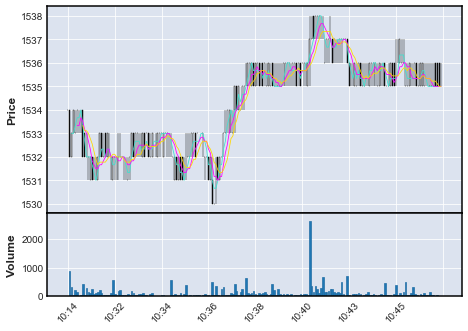

In [7]:
mpf.plot(df_bar_sec_5, type='candle', mav=(3, 6, 9), volume=True)

In [8]:
df_bar_sec_10 = read_bar_from_sql(SYMBOL, START_DATE, START_TIME, 'SEC', 10)
print(df_bar_sec_10.shape)

df_bar_sec_10[df_bar_sec_10['time'] >= START_TIME][B_COLUMNS].head(5)

(918, 13)


,open,high,low,close,volume,ask_price,ask_volume,bid_price,bid_volume
ts,,,,,,,,,
2023-08-16 10:14:50,1534.0,1534.0,1534.0,1534.0,0,1534.000,112,1533.000,170
2023-08-16 10:30:00,1534.0,1534.0,1532.0,1533.0,1208,1533.323,3968,1532.401,3289
2023-08-16 10:30:10,1533.0,1534.0,1533.0,1533.0,239,1534.000,6946,1533.000,3840
2023-08-16 10:30:20,1534.0,1534.0,1533.0,1534.0,141,1534.000,4763,1533.000,3199
2023-08-16 10:30:30,1534.0,1534.0,1532.0,1532.0,464,1533.709,4979,1532.501,4805


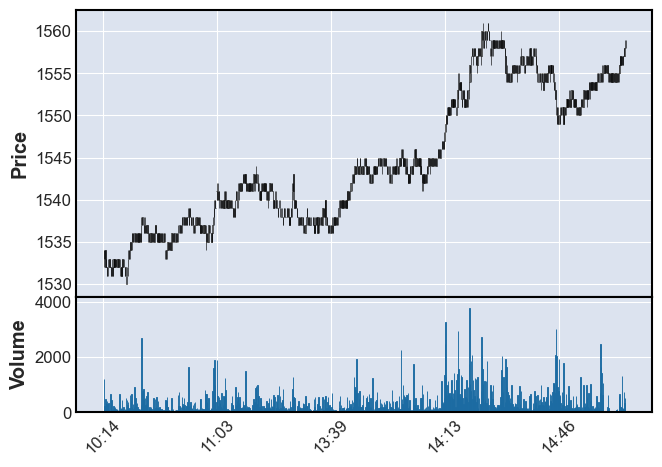

In [9]:
mpf.plot(df_bar_sec_10, type='candle', volume=True)
# mpf.plot(df_bar_sec_5, type='candle', mav=(3, 6, 9), volume=True)

In [10]:
df_bar_sec_15 = read_bar_from_sql(SYMBOL, START_DATE, START_TIME, 'SEC', 15)
print(df_bar_sec_15.shape)
df_bar_sec_15[B_COLUMNS].head(5)

(621, 13)


,open,high,low,close,volume,ask_price,ask_volume,bid_price,bid_volume
ts,,,,,,,,,
2023-08-16 10:14:45,1534.0,1534.0,1534.0,1534.0,0,1534.000,112,1533.000,170
2023-08-16 10:30:00,1534.0,1534.0,1532.0,1534.0,1248,1533.630,7273,1532.624,5231
2023-08-16 10:30:15,1533.0,1534.0,1533.0,1534.0,349,1534.000,8404,1533.000,5097
2023-08-16 10:30:30,1534.0,1534.0,1532.0,1532.0,550,1533.529,6686,1532.317,7612
2023-08-16 10:30:45,1532.0,1533.0,1531.0,1532.0,523,1532.354,5126,1531.124,10835


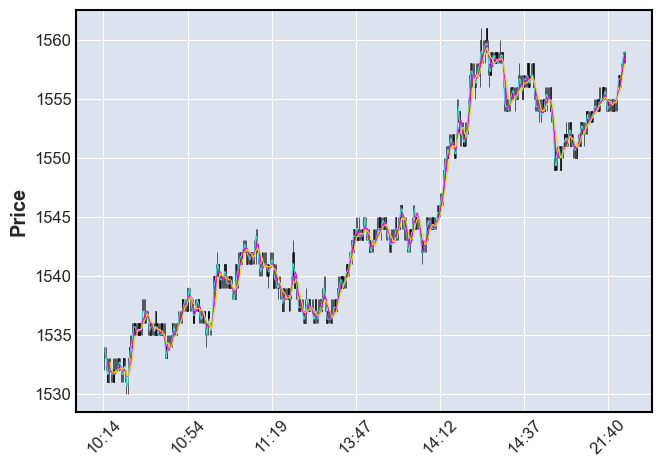

In [11]:
mpf.plot(df_bar_sec_15, type='candle', mav=(3, 6, 9))

In [12]:
df_bar_sec_15[B_COLUMNS].head(10)

,open,high,low,close,volume,ask_price,ask_volume,bid_price,bid_volume
ts,,,,,,,,,
2023-08-16 10:14:45,1534.0,1534.0,1534.0,1534.0,0,1534.000,112,1533.000,170
2023-08-16 10:30:00,1534.0,1534.0,1532.0,1534.0,1248,1533.630,7273,1532.624,5231
2023-08-16 10:30:15,1533.0,1534.0,1533.0,1534.0,349,1534.000,8404,1533.000,5097
2023-08-16 10:30:30,1534.0,1534.0,1532.0,1532.0,550,1533.529,6686,1532.317,7612
2023-08-16 10:30:45,1532.0,1533.0,1531.0,1532.0,523,1532.354,5126,1531.124,10835
2023-08-16 10:31:00,1532.0,1532.0,1531.0,1531.0,531,1532.163,8503,1531.052,11937
2023-08-16 10:31:15,1531.0,1533.0,1531.0,1532.0,465,1532.887,9512,1531.686,6932
2023-08-16 10:31:30,1532.0,1533.0,1532.0,1533.0,124,1533.000,8248,1532.000,6341
2023-08-16 10:31:45,1533.0,1533.0,1532.0,1532.0,52,1533.000,2602,1532.000,1316


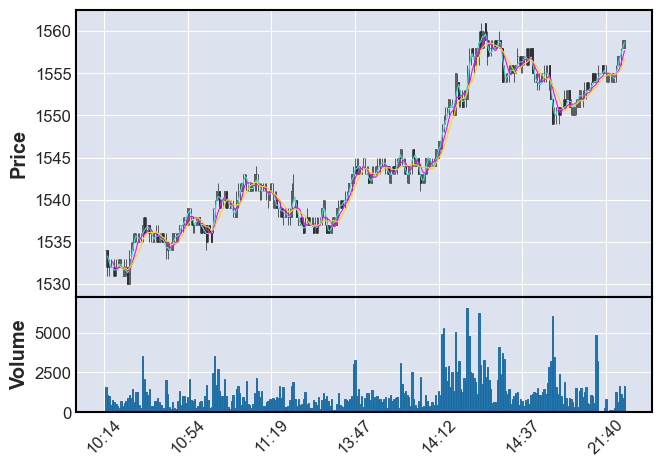

In [13]:
df_bar_sec_30 = read_bar_from_sql(SYMBOL, START_DATE, START_TIME, 'SEC', 30)
mpf.plot(df_bar_sec_30, type='candle', mav=(3, 6, 9), volume=True)

In [14]:
df_bar_min_1 = read_bar_from_sql(SYMBOL, START_DATE, START_TIME, 'MIN', 1)
print(df_bar_min_1.shape)
df_bar_min_1[B_COLUMNS].head()

(159, 13)


,open,high,low,close,volume,ask_price,ask_volume,bid_price,bid_volume
ts,,,,,,,,,
2023-08-16 10:14:00,1534.0,1534.0,1534.0,1534.0,0,1534.000,112,1533.000,170
2023-08-16 10:30:00,1534.0,1534.0,1531.0,1532.0,2676,1533.481,27489,1532.046,28775
2023-08-16 10:31:00,1532.0,1533.0,1531.0,1532.0,1424,1532.715,28865,1531.492,26526
2023-08-16 10:32:00,1532.0,1533.0,1531.0,1531.0,1412,1532.238,21420,1531.035,55249
2023-08-16 10:33:00,1532.0,1533.0,1531.0,1532.0,868,1532.945,33885,1531.801,40875


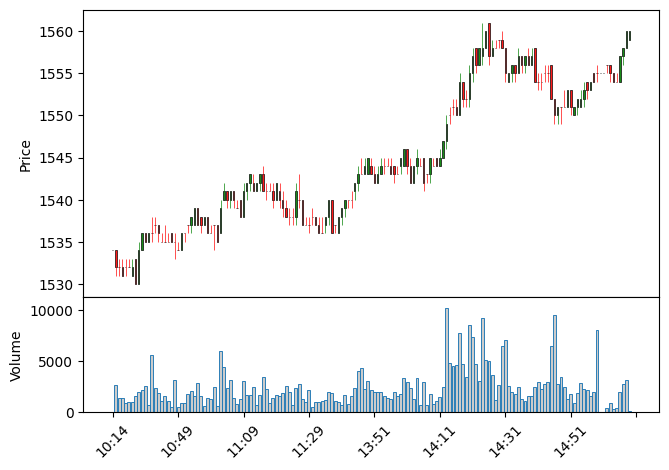

In [15]:
market_colors = mpf.make_marketcolors(up='green', 
                                      down='red', 
                                      edge='black', 
                                      wick={'up':'green', 'down':'red'}, 
                                      volume='#CCC') 
my_style = mpf.make_mpf_style(marketcolors=market_colors) 

mpf.plot(df_bar_min_1, type='candle', volume=True, style=my_style)

In [16]:
df_bar_min_1[B_COLUMNS].head(15)

,open,high,low,close,volume,ask_price,ask_volume,bid_price,bid_volume
ts,,,,,,,,,
2023-08-16 10:14:00,1534.0,1534.0,1534.0,1534.0,0,1534.000,112,1533.000,170
2023-08-16 10:30:00,1534.0,1534.0,1531.0,1532.0,2676,1533.481,27489,1532.046,28775
2023-08-16 10:31:00,1532.0,1533.0,1531.0,1532.0,1424,1532.715,28865,1531.492,26526
2023-08-16 10:32:00,1532.0,1533.0,1531.0,1531.0,1412,1532.238,21420,1531.035,55249
2023-08-16 10:33:00,1532.0,1533.0,1531.0,1532.0,868,1532.945,33885,1531.801,40875
2023-08-16 10:34:00,1532.0,1533.0,1532.0,1532.0,998,1532.848,28346,1531.817,52677
2023-08-16 10:35:00,1531.0,1533.0,1531.0,1532.0,985,1532.429,35851,1531.320,55666
2023-08-16 10:36:00,1533.0,1533.0,1530.0,1530.0,1591,1532.157,19391,1531.159,45265
2023-08-16 10:37:00,1530.0,1535.0,1530.0,1534.0,2002,1533.735,46382,1532.226,33838


In [17]:
df_bar_min_5 = read_bar_from_sql(SYMBOL, START_DATE, START_TIME, 'MIN', 5)
df_bar_min_5.shape

(35, 13)

In [18]:
df_bar_min_5[B_COLUMNS].head(15)

,open,high,low,close,volume,ask_price,ask_volume,bid_price,bid_volume
ts,,,,,,,,,
2023-08-16 10:10:00,1534.0,1534.0,1534.0,1534.0,0,1534.000,112,1533.000,170
2023-08-16 10:30:00,1534.0,1534.0,1531.0,1532.0,8178,1532.841,140005,1531.583,204102
2023-08-16 10:35:00,1531.0,1536.0,1530.0,1535.0,9277,1534.621,230116,1532.688,210719
2023-08-16 10:40:00,1535.0,1538.0,1535.0,1535.0,11636,1536.341,230512,1535.360,298480
2023-08-16 10:45:00,1535.0,1537.0,1533.0,1534.0,6879,1535.639,189356,1534.772,137608
2023-08-16 10:50:00,1534.0,1539.0,1534.0,1539.0,7158,1537.224,299646,1536.256,217046
2023-08-16 10:55:00,1539.0,1539.0,1536.0,1536.0,7652,1537.908,297943,1536.552,222579
2023-08-16 11:00:00,1537.0,1542.0,1534.0,1540.0,16415,1538.488,225484,1537.251,188202
2023-08-16 11:05:00,1540.0,1542.0,1538.0,1541.0,9996,1540.313,246647,1538.843,225753


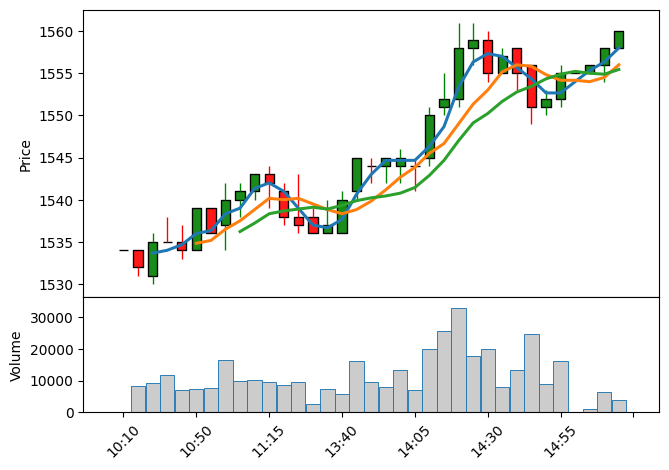

In [19]:
mpf.plot(df_bar_min_5, type='candle', volume=True, mav=(3, 6, 9), style=my_style)